In [1]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 15.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from scipy import stats

/var/folders/9s/_42jg5ds12l364yqldkmcvvw0000gn/T/ipykernel_60667/1490225142.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data Reading

In [3]:
sp500_df= pd.read_csv("sp500_companies.csv")
sp500_df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NMS,CZR,"Caesars Entertainment, Inc.","Caesars Entertainment, Inc.",Consumer Cyclical,Resorts & Casinos,32.82,6973593600,3.668000e+09,-0.040,Reno,NV,United States,51000.0,"Caesars Entertainment, Inc. operates as a gami...",0.000125
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,31.88,6972155904,1.882000e+09,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000125
499,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,70.85,6697217024,6.731300e+08,-0.052,Greensboro,NC,United States,8700.0,"Qorvo, Inc. engages in development and commerc...",0.000120
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,50.15,6260525568,7.033000e+08,0.085,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000113


In [4]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

In [5]:
#check for any null values
null_value = sp500_df.isnull().sum()
print(null_value)

#show which companies have null value
sp500_df[sp500_df.isnull().any(axis=1)]

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
12,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,237.60,668924837888,NaN,0.030,New York,NY,United States,316043.0,JPMorgan Chase & Co. operates as a financial s...,0.012035
13,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,317.71,615235846144,2.497300e+10,0.117,San Francisco,CA,United States,NaN,Visa Inc. operates as a payment technology com...,0.011069
23,NYQ,BAC,Bank of America Corporation,Bank of America Corporation,Financial Services,Banks - Diversified,44.17,338911100928,NaN,-0.005,Charlotte,NC,United States,213000.0,"Bank of America Corporation, through its subsi...",0.006097
30,NYQ,WFC,Wells Fargo & Company,Wells Fargo & Company,Financial Services,Banks - Diversified,70.34,234196303872,NaN,-0.018,San Francisco,CA,United States,220167.0,"Wells Fargo & Company, a financial services co...",0.004213
32,NYQ,ACN,Accenture plc,Accenture plc,Technology,Information Technology Services,366.37,229157109760,1.106591e+10,0.026,Dublin,NaN,Ireland,774000.0,Accenture plc provides strategy and consulting...,0.004123
34,NYQ,AXP,American Express Company,American Express Company,Financial Services,Credit Services,298.65,210382487552,NaN,0.080,New York,NY,United States,74600.0,"American Express Company, together with its su...",0.003785
37,NYQ,BX,Blackstone Inc.,Blackstone Inc.,Financial Services,Asset Management,170.84,207208415232,NaN,0.541,New York,NY,United States,4735.0,Blackstone Inc. is an alternative asset manage...,0.003728
40,NMS,LIN,Linde plc,Linde plc,Basic Materials,Specialty Chemicals,424.31,202038607872,1.258100e+10,0.025,Woking,NaN,United Kingdom,65596.0,Linde plc operates as an industrial gas compan...,0.003635
42,NYQ,MS,Morgan Stanley,Morgan Stanley,Financial Services,Capital Markets,123.44,198866780160,NaN,0.165,New York,NY,United States,80000.0,"Morgan Stanley, a financial holding company, p...",0.003578
51,NYQ,GS,"Goldman Sachs Group, Inc. (The)","The Goldman Sachs Group, Inc.",Financial Services,Capital Markets,566.10,177704452096,NaN,0.042,New York,NY,United States,46400.0,"The Goldman Sachs Group, Inc., a financial ins...",0.003197


In [6]:
#filled the Null value with a value as the company doesnt have a state since its an International Company

sp500_df["State"].fillna('International Company',inplace=True)
sp500_df["State"][94:]

/var/folders/9s/_42jg5ds12l364yqldkmcvvw0000gn/T/ipykernel_60667/917344906.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp500_df["State"].fillna('International Company',inplace=True)


94     International Company
95                        MA
96                        ID
97                        WA
98                        CA
               ...          
497                       NV
498                       MI
499                       NC
500                       PA
501                       VA
Name: State, Length: 408, dtype: object

In [7]:
#filled the Null value with a value as the company doesnt have a state since its an International Company

sp500_df["Ebitda"].fillna('0.0',inplace=True)
sp500_df["Ebitda"][34]

/var/folders/9s/_42jg5ds12l364yqldkmcvvw0000gn/T/ipykernel_60667/1050871428.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp500_df["Ebitda"].fillna('0.0',inplace=True)
/var/folders/9s/_42jg5ds12l364yqldkmcvvw0000gn/T/ipykernel_60667/1050871428.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sp500_df["Ebitda"].fillna('0.0',inplace=True)


'0.0'

In [8]:
duplicate_rows = sp500_df[sp500_df.duplicated()]
print(f"The dataset has {len(duplicate_rows)} duplicate rows")

The dataset has 0 duplicate rows


In [9]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               502 non-null    object 
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                502 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

In [10]:
#divide the company into two different weights 
weight = sp500_df["Weight"]
weight.describe()

count    502.000000
mean       0.001992
std        0.006189
min        0.000084
25%        0.000348
50%        0.000667
75%        0.001409
max        0.069209
Name: Weight, dtype: float64

In [11]:
#create a highly weighted stock so that it is a fair comparison
highly_Weighted_Stock_df = sp500_df[sp500_df["Weight"]> 0.001992]   
highly_Weighted_Stock_df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,134660997120.0,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,61184000000.0,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,136551997440.0,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,111583002624.0,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,123469996032.0,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NYQ,FI,"Fiserv, Inc.","Fiserv, Inc.",Technology,Information Technology Services,206.05,117225758720,8766000128.0,0.070,Milwaukee,WI,United States,42000.0,"Fiserv, Inc., together with its subsidiaries, ...",0.002109
86,NYQ,BMY,Bristol-Myers Squibb Company,Bristol-Myers Squibb Company,Healthcare,Drug Manufacturers - General,57.33,116275560448,19161999360.0,0.084,Princeton,NJ,United States,34100.0,"Bristol-Myers Squibb Company discovers, develo...",0.002092
87,NYQ,LMT,Lockheed Martin Corporation,Lockheed Martin Corporation,Industrials,Aerospace & Defense,489.02,115914858496,10225999872.0,0.013,Bethesda,MD,United States,122000.0,"Lockheed Martin Corporation, a security and ae...",0.002085
88,NMS,GILD,"Gilead Sciences, Inc.","Gilead Sciences, Inc.",Healthcare,Drug Manufacturers - General,92.57,115367206912,13948999680.0,0.070,Foster City,CA,United States,18000.0,"Gilead Sciences, Inc., a biopharmaceutical com...",0.002076


In [12]:
#create a lowly weighted stock so that it is a fair comparison
lowly_Weighted_Stock_df = sp500_df[sp500_df["Weight"]< 0.001992]   
lowly_Weighted_Stock_df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
90,NYQ,CB,Chubb Limited,Chubb Limited,Financial Services,Insurance - Property & Casualty,273.20,110126374912,11363000320.0,0.078,Zurich,International Company,Switzerland,40000.0,Chubb Limited provides insurance and reinsuran...,0.001981
91,NYQ,UPS,"United Parcel Service, Inc.","United Parcel Service, Inc.",Industrials,Integrated Freight & Logistics,125.68,107251539968,12007999488.0,0.056,Atlanta,GA,United States,500000.0,"United Parcel Service, Inc., a package deliver...",0.001930
92,NMS,ADI,"Analog Devices, Inc.","Analog Devices, Inc.",Technology,Semiconductors,211.78,105105776640,4361349120.0,-0.248,Wilmington,MA,United States,26000.0,"Analog Devices, Inc. designs, manufactures, te...",0.001891
93,NYQ,MMC,"Marsh & McLennan Companies, Inc","Marsh & McLennan Companies, Inc.",Financial Services,Insurance Brokers,211.74,103990173696,7246000128.0,0.059,New York,NY,United States,85000.0,"Marsh & McLennan Companies, Inc., a profession...",0.001871
94,NYQ,MDT,Medtronic plc.,Medtronic plc,Healthcare,Medical Devices,81.03,103903961088,9013000192.0,0.028,Galway,International Company,Ireland,95000.0,"Medtronic plc develops, manufactures, and sell...",0.001869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NMS,CZR,"Caesars Entertainment, Inc.","Caesars Entertainment, Inc.",Consumer Cyclical,Resorts & Casinos,32.82,6973593600,3668000000.0,-0.040,Reno,NV,United States,51000.0,"Caesars Entertainment, Inc. operates as a gami...",0.000125
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,31.88,6972155904,1882000000.0,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000125
499,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,70.85,6697217024,673129984.0,-0.052,Greensboro,NC,United States,8700.0,"Qorvo, Inc. engages in development and commerc...",0.000120
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,50.15,6260525568,703299968.0,0.085,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000113


In [13]:
sp500_df['Sector'].unique()

array(['Technology', 'Consumer Cyclical', 'Communication Services',
       'Financial Services', 'Consumer Defensive', 'Healthcare', 'Energy',
       'Basic Materials', 'Industrials', 'Utilities', 'Real Estate'],
      dtype=object)

Data Analysis for Highly weighted Stocks by the SP 500

In [14]:
#We change the sectors into bimary to compare the values 
highly_Weighted_Stock_df['Sector'].unique()

array(['Technology', 'Consumer Cyclical', 'Communication Services',
       'Financial Services', 'Consumer Defensive', 'Healthcare', 'Energy',
       'Basic Materials', 'Industrials', 'Utilities'], dtype=object)

In [15]:
#we divided the sectors into numerical values

highly_Weighted_Stock_df['Sector'] = highly_Weighted_Stock_df['Sector'].replace({'Technology': 1, 'Consumer Cyclical': 3, 'Communication Services': 4, 'Financial Services': 5, 'Consumer Defensive':7,'Healthcare':2, 'Energy':10,'Basic Materials':11, 'Industrials':6,'Utilities':8})
highly_Weighted_Stock_df

/var/folders/9s/_42jg5ds12l364yqldkmcvvw0000gn/T/ipykernel_60667/522474013.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  highly_Weighted_Stock_df['Sector'] = highly_Weighted_Stock_df['Sector'].replace({'Technology': 1, 'Consumer Cyclical': 3, 'Communication Services': 4, 'Financial Services': 5, 'Consumer Defensive':7,'Healthcare':2, 'Energy':10,'Basic Materials':11, 'Industrials':6,'Utilities':8})
/var/folders/9s/_42jg5ds12l364yqldkmcvvw0000gn/T/ipykernel_60667/522474013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,1,Consumer Electronics,254.49,3846819807232,134660997120.0,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,1,Semiconductors,134.70,3298803056640,61184000000.0,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,1,Software - Infrastructure,436.60,3246068596736,136551997440.0,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",3,Internet Retail,224.92,2365033807872,111583002624.0,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,4,Internet Content & Information,191.41,2351625142272,123469996032.0,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NYQ,FI,"Fiserv, Inc.","Fiserv, Inc.",1,Information Technology Services,206.05,117225758720,8766000128.0,0.070,Milwaukee,WI,United States,42000.0,"Fiserv, Inc., together with its subsidiaries, ...",0.002109
86,NYQ,BMY,Bristol-Myers Squibb Company,Bristol-Myers Squibb Company,2,Drug Manufacturers - General,57.33,116275560448,19161999360.0,0.084,Princeton,NJ,United States,34100.0,"Bristol-Myers Squibb Company discovers, develo...",0.002092
87,NYQ,LMT,Lockheed Martin Corporation,Lockheed Martin Corporation,6,Aerospace & Defense,489.02,115914858496,10225999872.0,0.013,Bethesda,MD,United States,122000.0,"Lockheed Martin Corporation, a security and ae...",0.002085
88,NMS,GILD,"Gilead Sciences, Inc.","Gilead Sciences, Inc.",2,Drug Manufacturers - General,92.57,115367206912,13948999680.0,0.070,Foster City,CA,United States,18000.0,"Gilead Sciences, Inc., a biopharmaceutical com...",0.002076


Z score testing

In [16]:
#new data frame with only binary values to test it in z score
sp500_binary_df_highlyWeighted =highly_Weighted_Stock_df[['Sector','Currentprice', 'Marketcap','Ebitda','Revenuegrowth','Fulltimeemployees','Weight']]
sp500_binary_df_highlyWeighted

,Sector,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
0,1,254.49,3846819807232,134660997120.0,0.061,164000.0,0.069209
1,1,134.70,3298803056640,61184000000.0,1.224,29600.0,0.059350
2,1,436.60,3246068596736,136551997440.0,0.160,228000.0,0.058401
3,3,224.92,2365033807872,111583002624.0,0.110,1551000.0,0.042550
4,4,191.41,2351625142272,123469996032.0,0.151,181269.0,0.042309
...,...,...,...,...,...,...,...
85,1,206.05,117225758720,8766000128.0,0.070,42000.0,0.002109
86,2,57.33,116275560448,19161999360.0,0.084,34100.0,0.002092
87,6,489.02,115914858496,10225999872.0,0.013,122000.0,0.002085
88,2,92.57,115367206912,13948999680.0,0.070,18000.0,0.002076


In [17]:
#Identify and remove any outliers from the dataset to improve our model's accuracy
sp500_binary_df_highlyWeighted_df = sp500_binary_df_highlyWeighted.select_dtypes(include=[float,int])
z_scores = np.abs(stats.zscore(sp500_binary_df_highlyWeighted_df))
#setting a threshold for outlier detection
threshold = 3.0
outliers = np.where(z_scores > threshold)

In [18]:
cleaned_sp500_binary_df_highlyWeighted = sp500_binary_df_highlyWeighted_df.drop(outliers[0],axis=0)
cleaned_sp500_binary_df_highlyWeighted

,Sector,Currentprice,Marketcap,Revenuegrowth,Fulltimeemployees,Weight
3,3,224.92,2365033807872,0.110,1551000.0,0.042550
4,4,191.41,2351625142272,0.151,181269.0,0.042309
5,4,192.96,2351623045120,0.151,181269.0,0.042309
6,4,585.25,1477457739776,0.189,72404.0,0.026581
7,3,421.06,1351627833344,0.078,140473.0,0.024317
...,...,...,...,...,...,...
85,1,206.05,117225758720,0.070,42000.0,0.002109
86,2,57.33,116275560448,0.084,34100.0,0.002092
87,6,489.02,115914858496,0.013,122000.0,0.002085
88,2,92.57,115367206912,0.070,18000.0,0.002076


/Users/tenzinuden/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tenzinuden/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tenzinuden/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tenzinuden/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

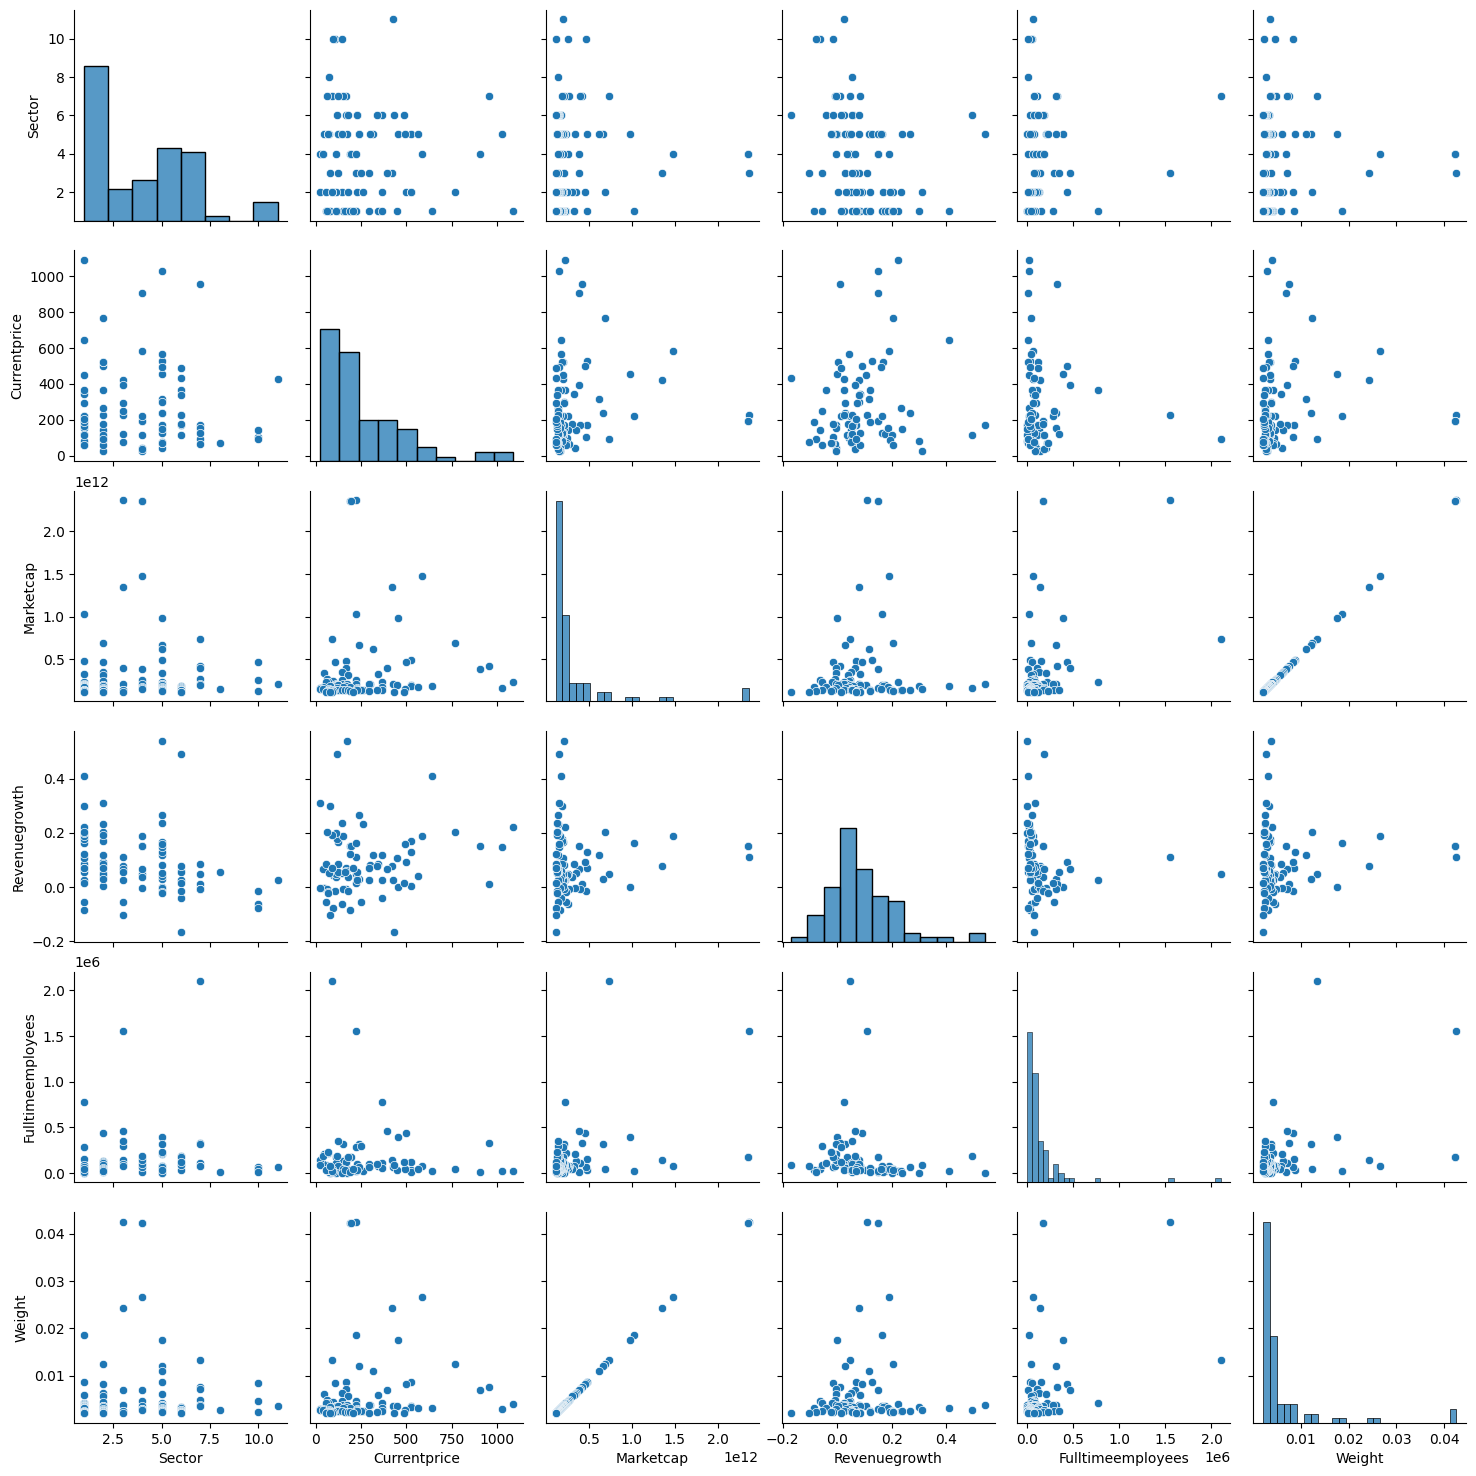

In [19]:
sns.pairplot(cleaned_sp500_binary_df_highlyWeighted)

In [20]:
cleaned_sp500_binary_df_highlyWeighted["ExpectedFuturePrice"] = (
    cleaned_sp500_binary_df_highlyWeighted['Currentprice'] * (1 + 0.5 * cleaned_sp500_binary_df_highlyWeighted['Revenuegrowth']))

cleaned_sp500_binary_df_highlyWeighted

,Sector,Currentprice,Marketcap,Revenuegrowth,Fulltimeemployees,Weight,ExpectedFuturePrice
3,3,224.92,2365033807872,0.110,1551000.0,0.042550,237.290600
4,4,191.41,2351625142272,0.151,181269.0,0.042309,205.861455
5,4,192.96,2351623045120,0.151,181269.0,0.042309,207.528480
6,4,585.25,1477457739776,0.189,72404.0,0.026581,640.556125
7,3,421.06,1351627833344,0.078,140473.0,0.024317,437.481340
...,...,...,...,...,...,...,...
85,1,206.05,117225758720,0.070,42000.0,0.002109,213.261750
86,2,57.33,116275560448,0.084,34100.0,0.002092,59.737860
87,6,489.02,115914858496,0.013,122000.0,0.002085,492.198630
88,2,92.57,115367206912,0.070,18000.0,0.002076,95.809950


In [21]:
clean_data= cleaned_sp500_binary_df_highlyWeighted.dropna(subset=['Sector','Currentprice', 'Marketcap','Revenuegrowth','Fulltimeemployees','Weight','ExpectedFuturePrice'])


clean_data


,Sector,Currentprice,Marketcap,Revenuegrowth,Fulltimeemployees,Weight,ExpectedFuturePrice
3,3,224.92,2365033807872,0.110,1551000.0,0.042550,237.290600
4,4,191.41,2351625142272,0.151,181269.0,0.042309,205.861455
5,4,192.96,2351623045120,0.151,181269.0,0.042309,207.528480
6,4,585.25,1477457739776,0.189,72404.0,0.026581,640.556125
7,3,421.06,1351627833344,0.078,140473.0,0.024317,437.481340
...,...,...,...,...,...,...,...
85,1,206.05,117225758720,0.070,42000.0,0.002109,213.261750
86,2,57.33,116275560448,0.084,34100.0,0.002092,59.737860
87,6,489.02,115914858496,0.013,122000.0,0.002085,492.198630
88,2,92.57,115367206912,0.070,18000.0,0.002076,95.809950


In [22]:
#We scale our data to bring everything down to one scale for better analysis

scaler = StandardScaler()


x=clean_data[['Currentprice', 'Marketcap','Revenuegrowth']]
y = clean_data["ExpectedFuturePrice"]
combine = pd.concat([x,y],axis=1)
combine.dropna()

x = combine.drop(['ExpectedFuturePrice'], axis=1)
y = combine['ExpectedFuturePrice']
cols = x.columns

x = scaler.fit_transform(x) 


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [24]:
lr = LinearRegression()
lr.fit(x_train, y_train)

predict = lr.predict(x_test)

In [25]:
r2_score(y_test, predict)


0.9948351976389633

<Axes: xlabel='ExpectedFuturePrice'>

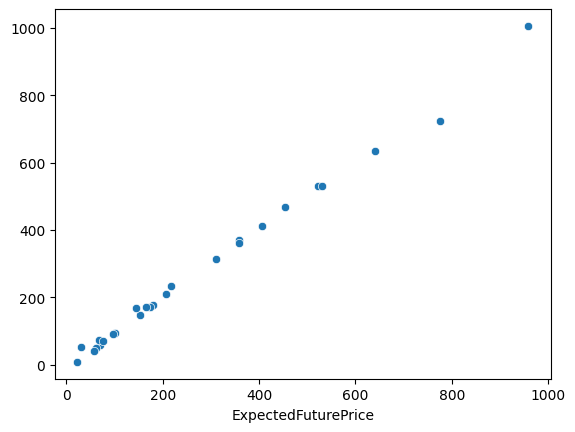

In [26]:
sns.scatterplot(x=y_test, y=predict)


/Users/tenzinuden/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ExpectedFuturePrice', ylabel='Count'>

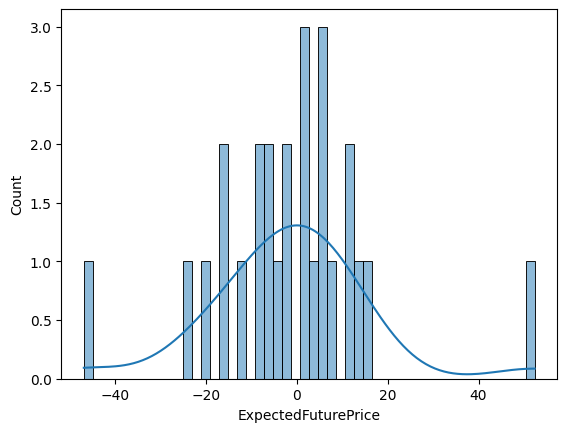

In [27]:
sns.histplot((y_test - predict), bins=50, kde=True)


In [28]:

#We should also observe the coefficients that were calculated during the Linear Regression
cdf = pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients', ascending=False)
cdf


,coefficients
Currentprice,245.469447
Revenuegrowth,14.691892
Marketcap,0.024317
